In [1]:
from standard_env import StandardEnv, TelescopeEnv
from standard_DPG_random import DPGAgent
import torch

env = StandardEnv(
    T = 300,
    I_max = 20,
    lambd = 50/300,
    Delta = 0.01,
    phi = 1e-6, # 1e-6
    varphi = 1e-2, # 1e-2
    sigma = 1e-3, 
    gamma = 1, 
    S_0 = 20,
    X_0 = 0,
    q_0 = 0
)

tenv = TelescopeEnv(
    T = 300,
    I_max = 20,
    lambd = 50/300,
    Delta = 0.01,
    phi = 1e-6, # 1e-6
    varphi = 1e-2, # 1e-2
    sigma = 1e-3, 
    gamma = 1, 
    S_0 = 20,
    X_0 = 0,
    q_0 = 0,
)
agent = DPGAgent(env=tenv, gamma=0.99, lr_q=1e-3, lr_p=1e-2, n_layers=6, n_nodes=128, exploration_p=0.03, name="test") #TODO: 200 nodes more #
# TODO lr0.0005 1e-3 1e-2 5e-4,


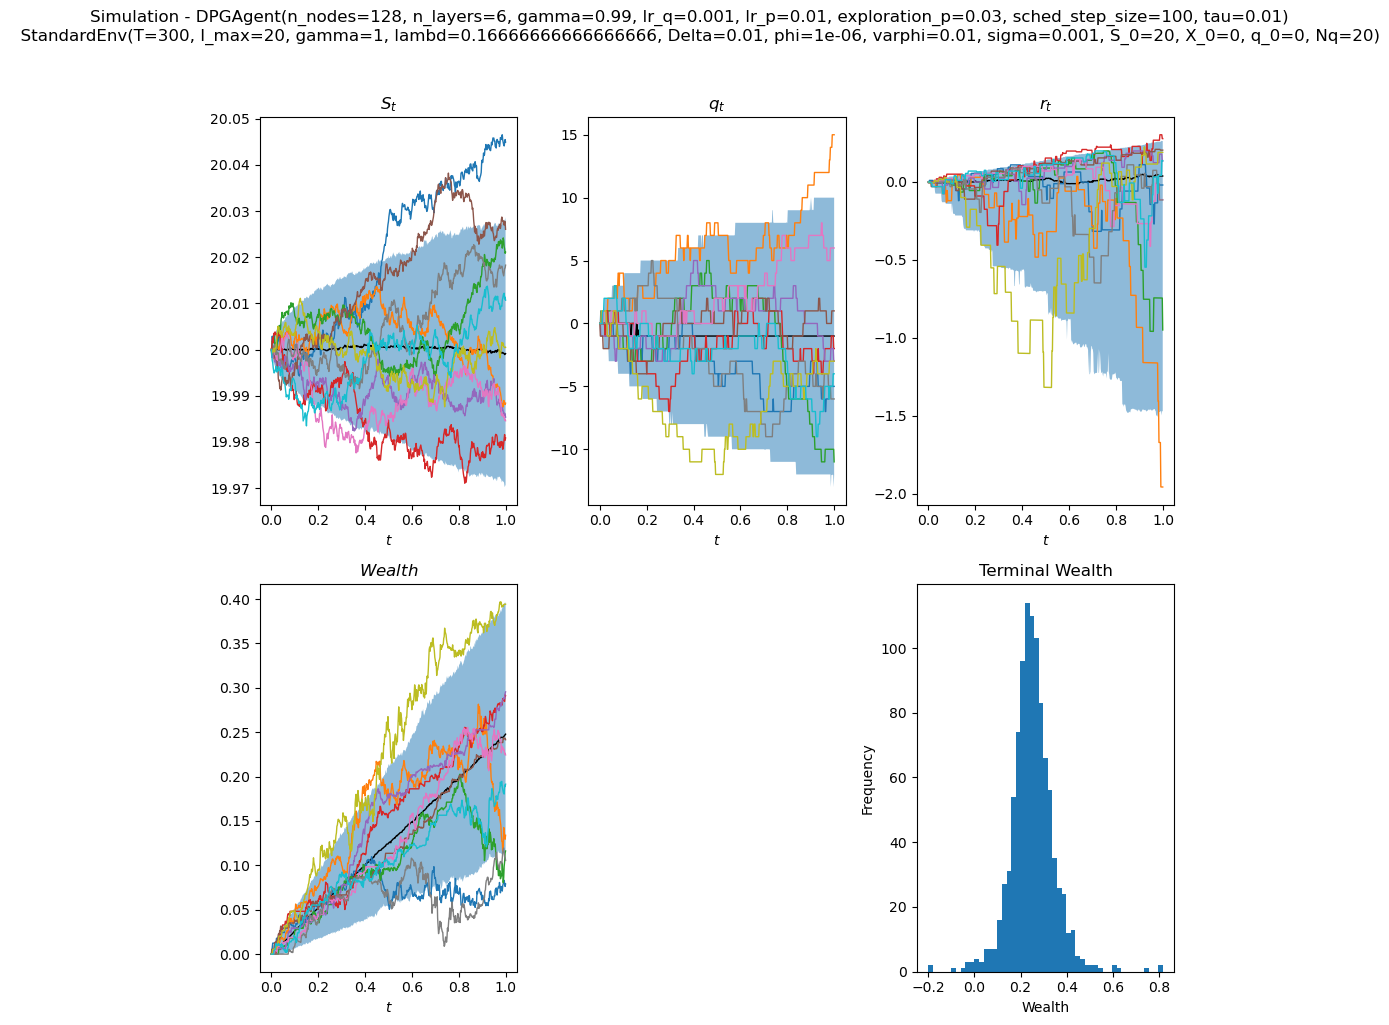

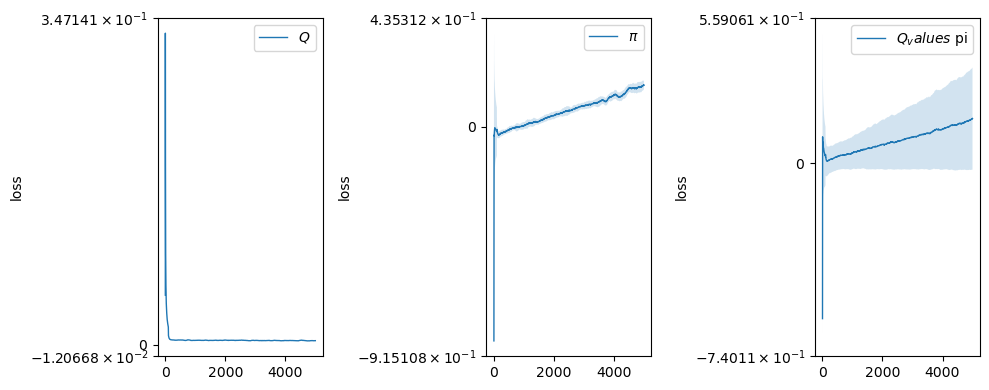

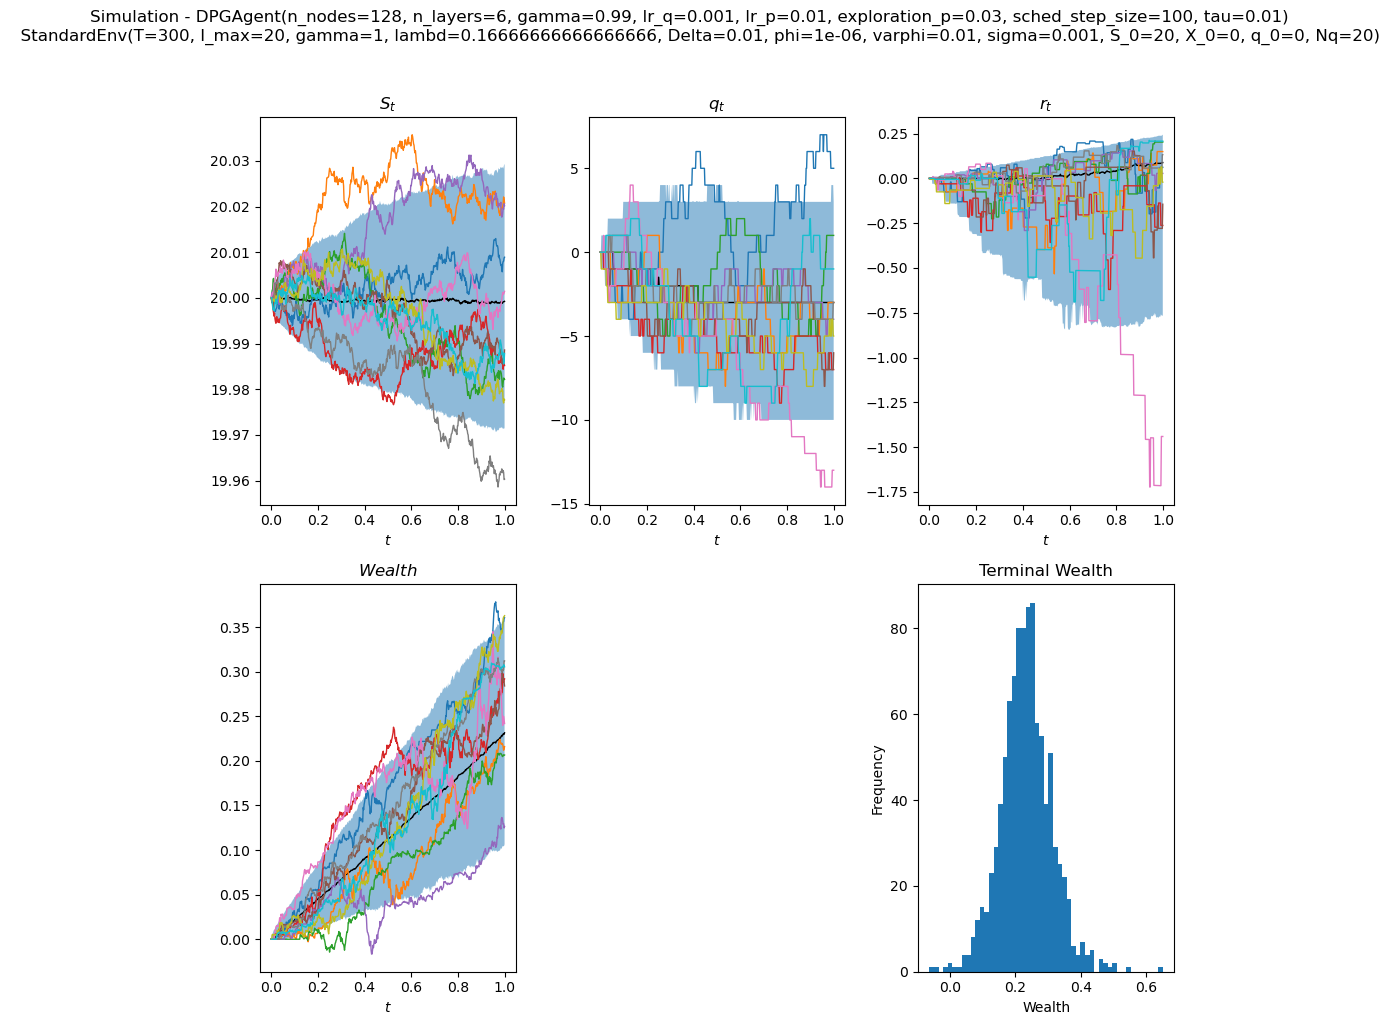

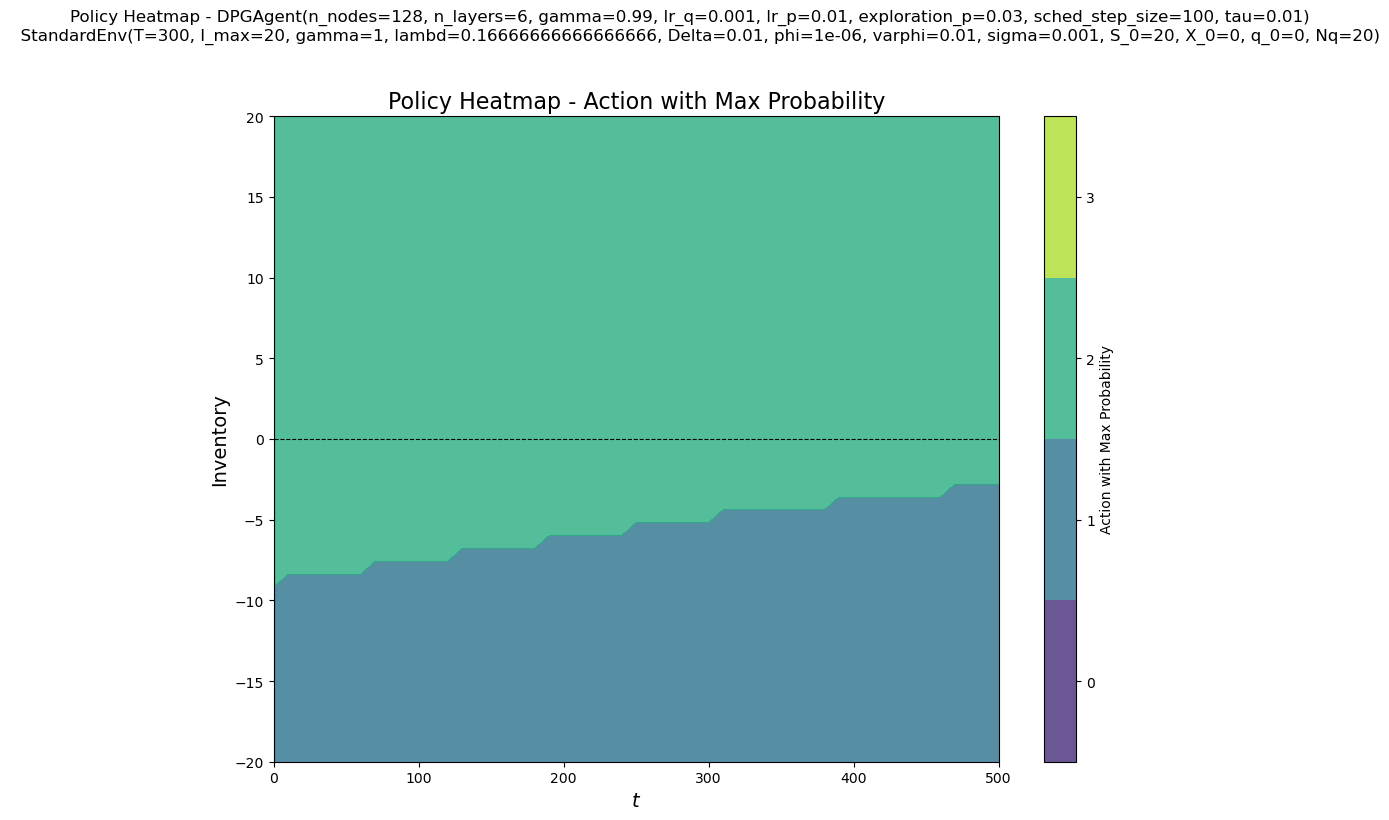

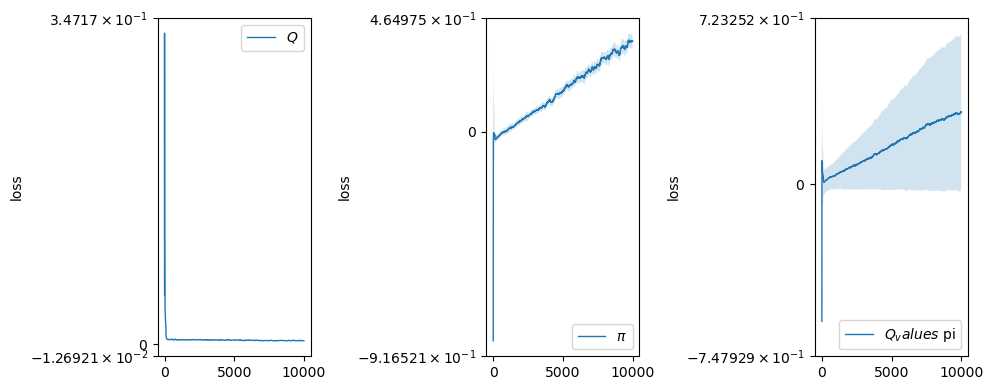

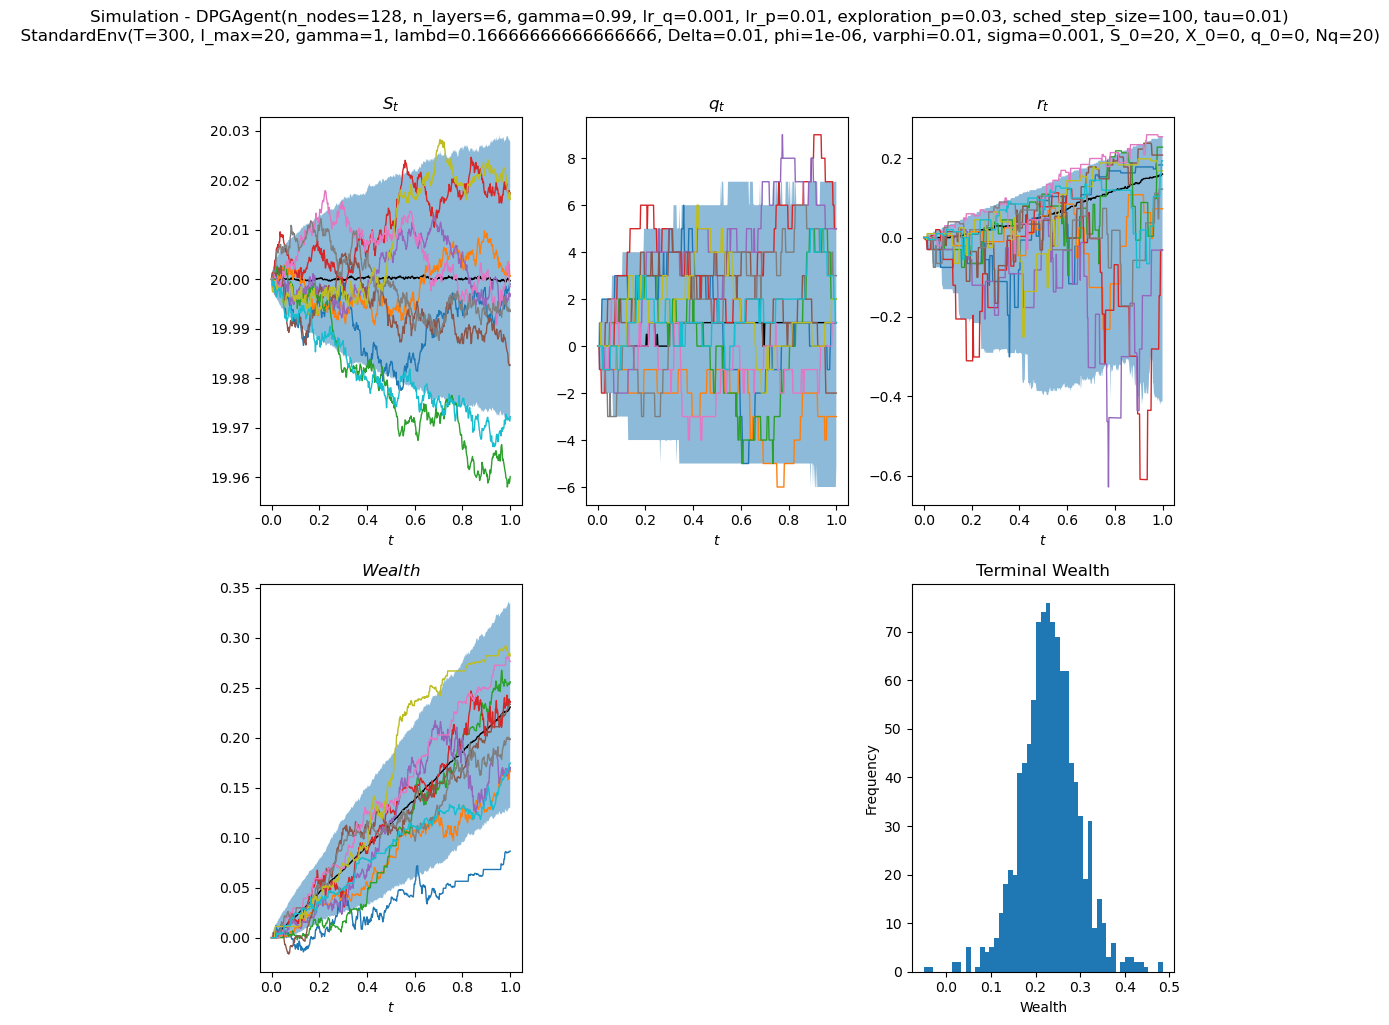

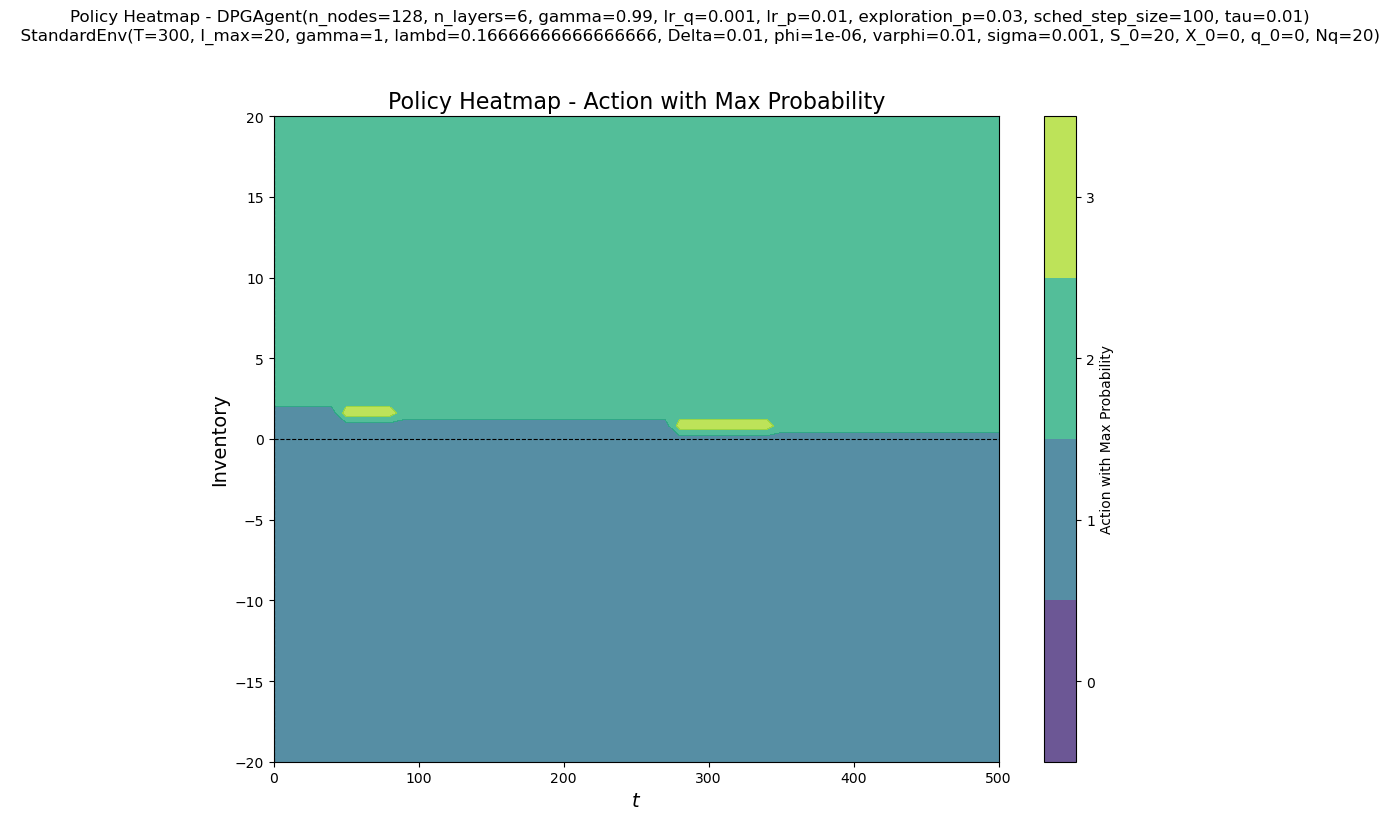

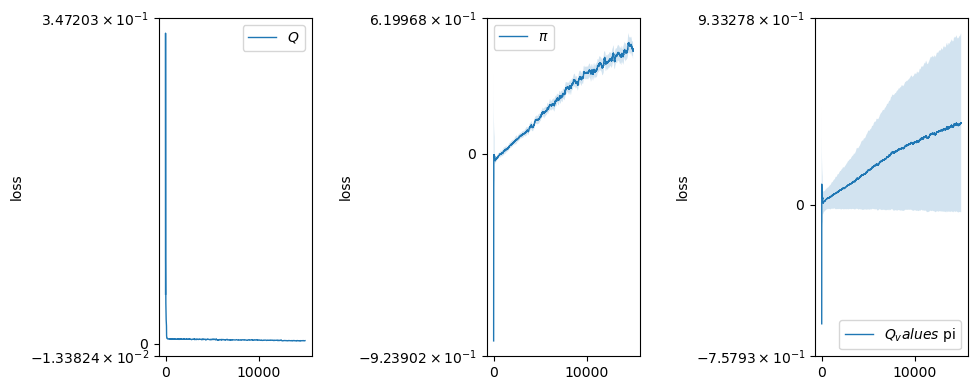

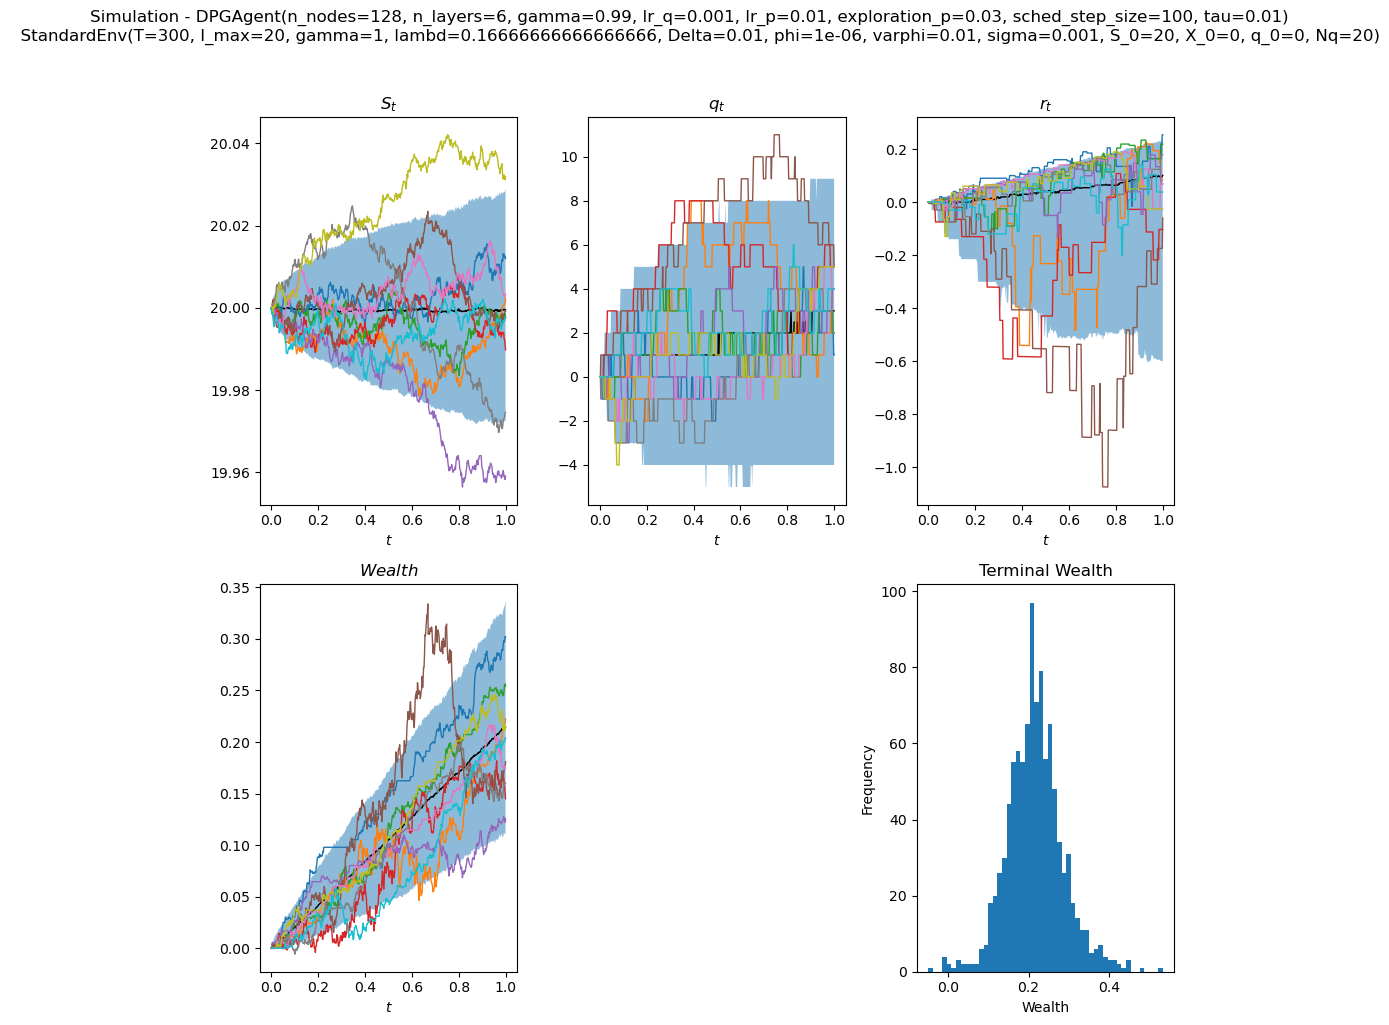

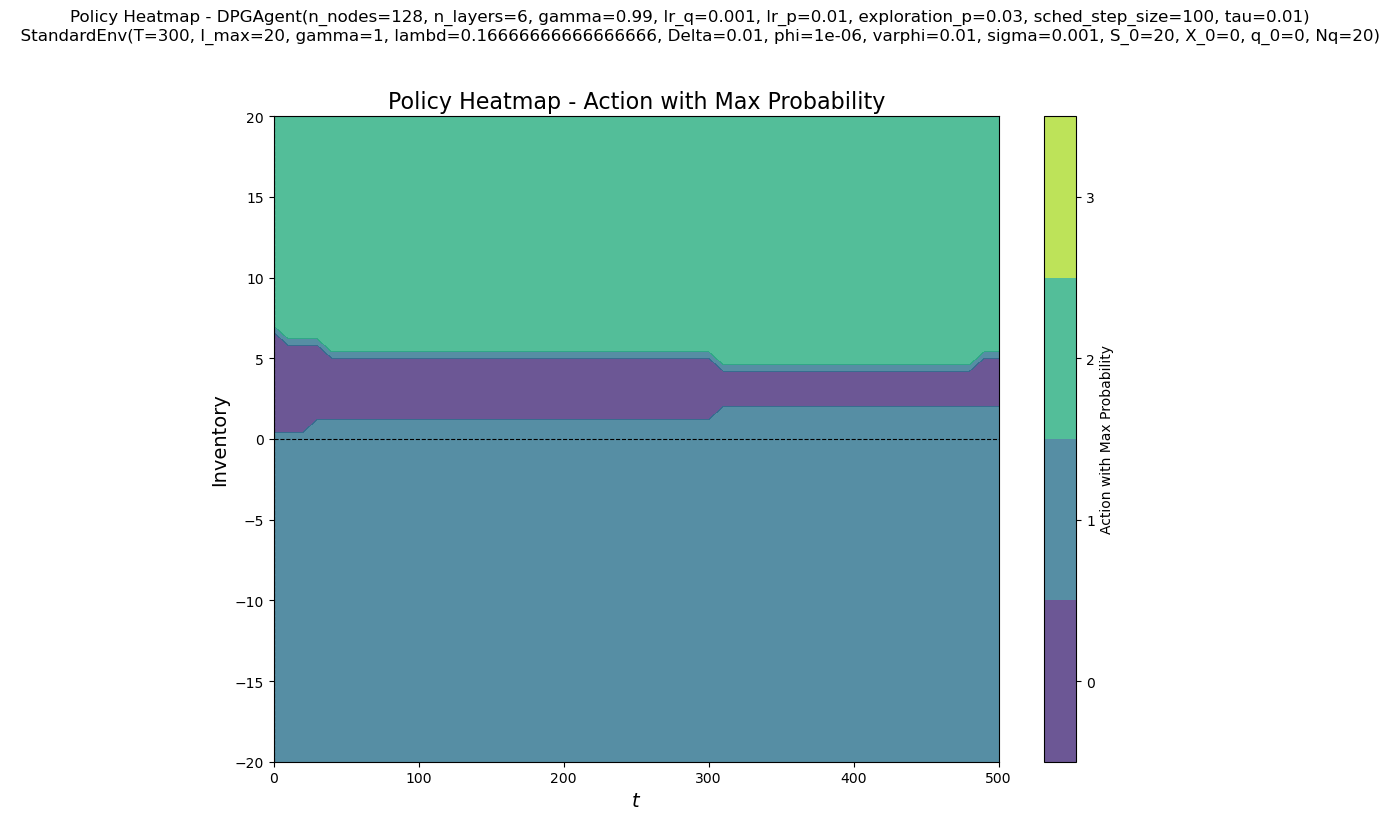

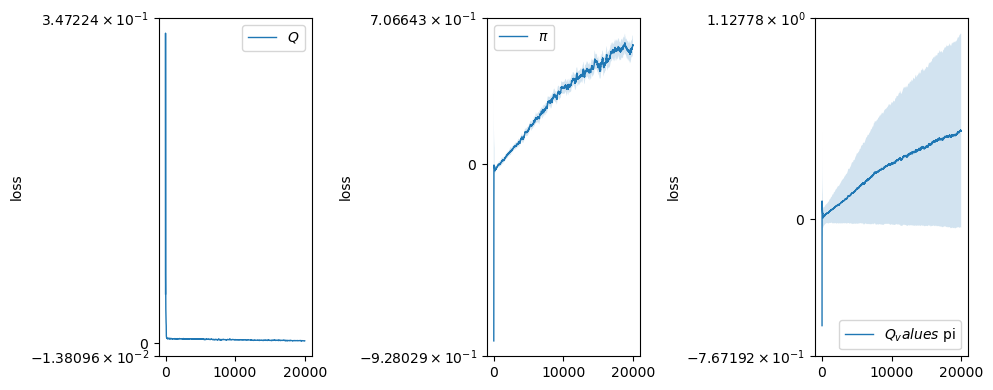

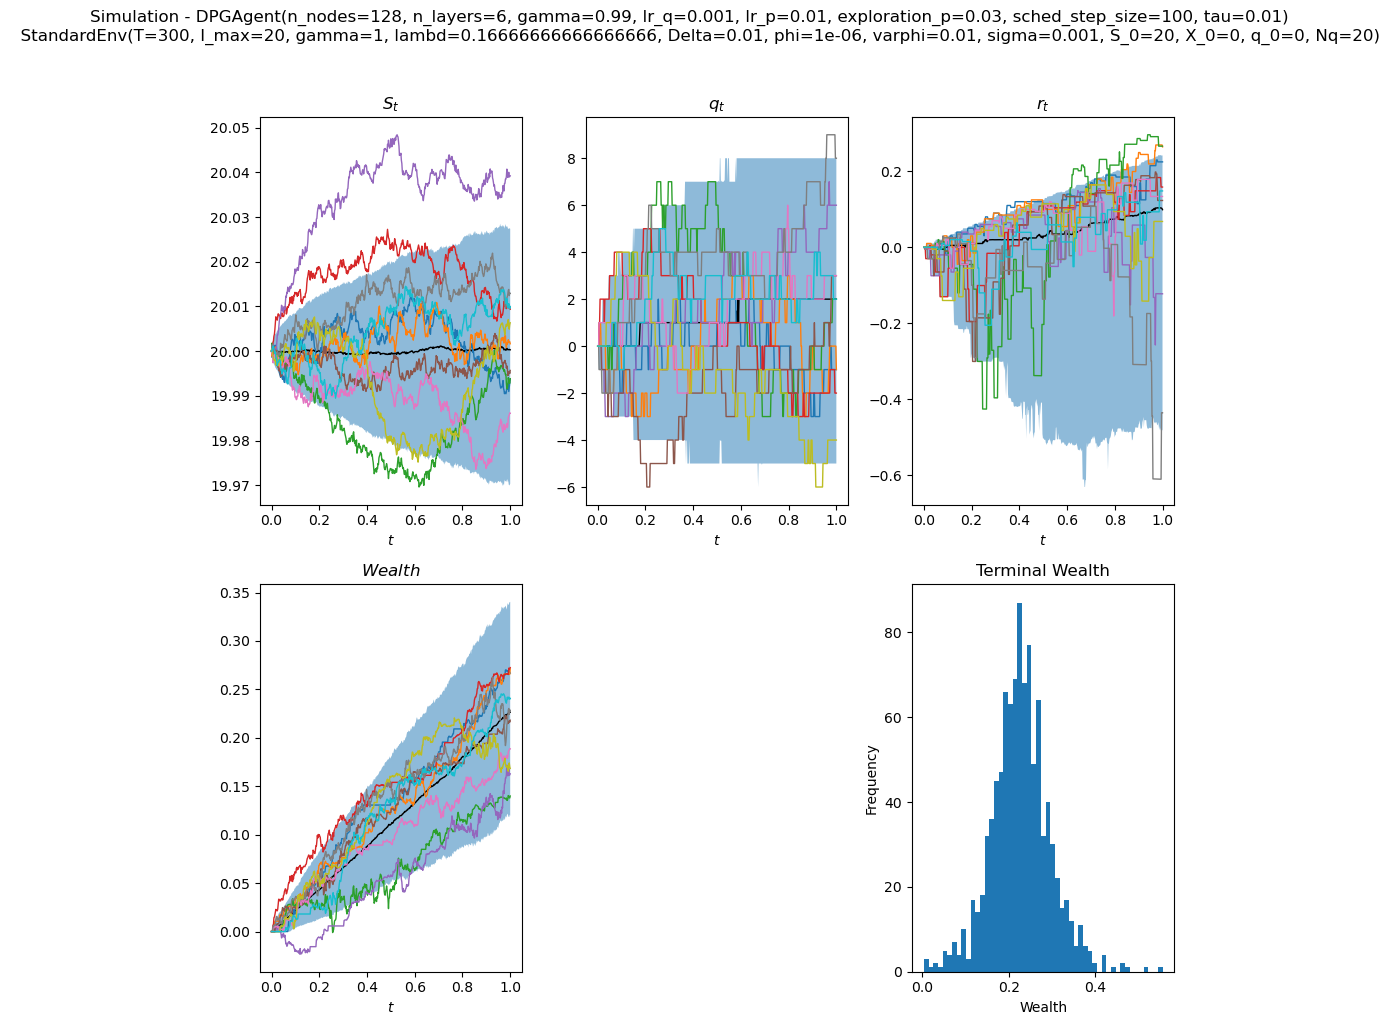

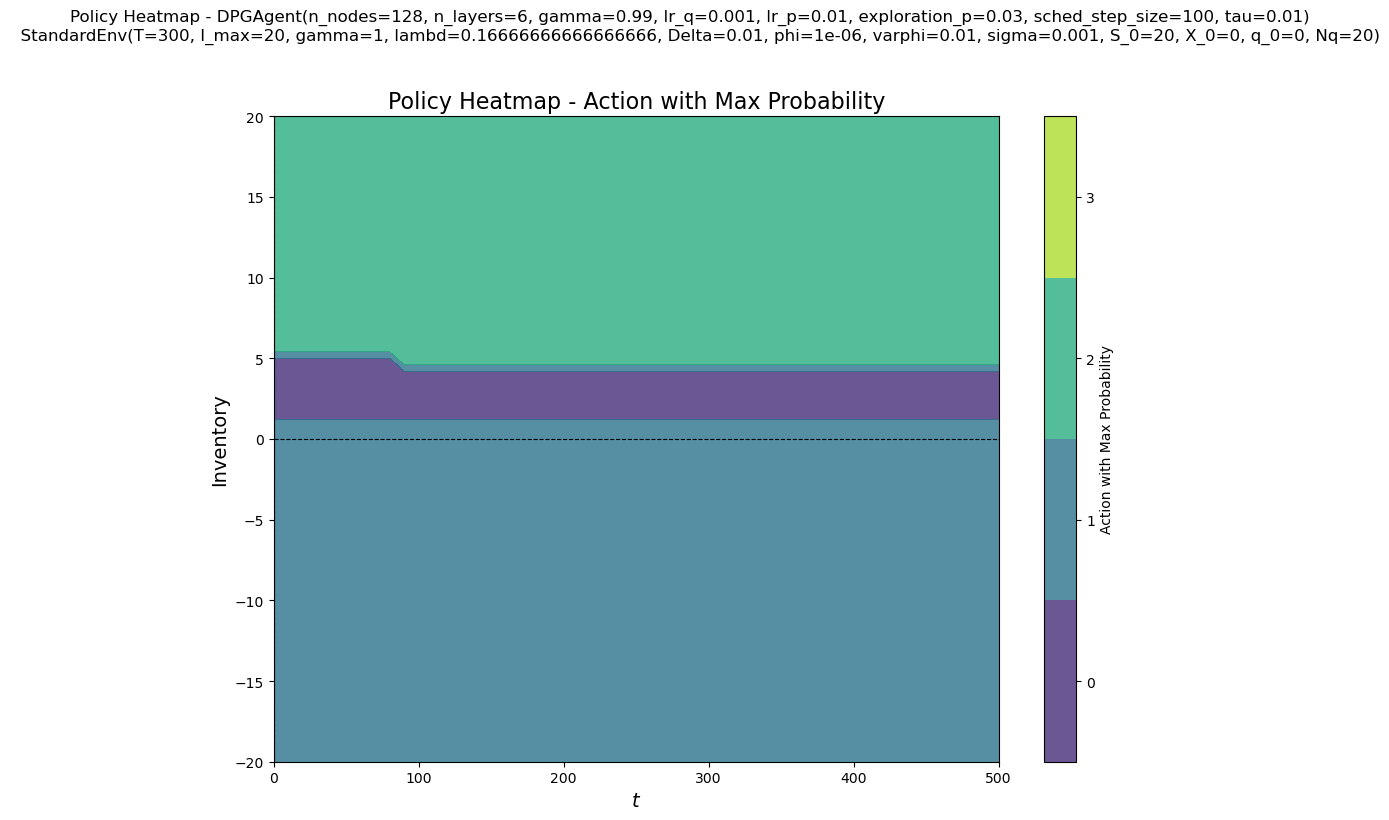

In [2]:
# agent.plot_policy()
agent.train(n_iter=20000, n_plot=5000,mini_batch_size=128, n_iter_Q=1, n_iter_pi=1)

In [3]:
t=400
q=10
state = agent.__stack_state__(
                        t=torch.tensor([t]),
                        S=20 * torch.ones(1),
                        X=torch.zeros(1),
                        q=torch.tensor([q]),
                    )
policy_output = agent.pi_main["net"](state).squeeze()
policy_output

tensor([0.2648, 0.0978, 0.4183, 0.2191], grad_fn=<SqueezeBackward0>)